In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
name='pr_08_24_all'
df = pd.read_csv(name+'.csv') 

COMMIT_ALG     ONE_PC    TWO_PC
PERC_REMOTE                    
0.1          7695.482  4934.032


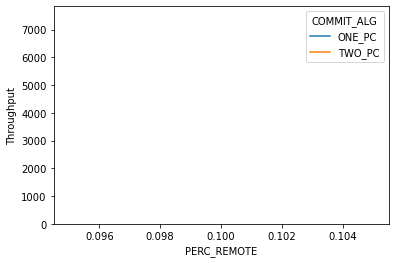

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'PERC_REMOTE'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='PERC_REMOTE', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
plot.set_xlabel("PERC_REMOTE")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
fig.savefig(name+".png")


In [46]:
latency = grouped['average_latency', 'average_local_latency', 'average_distributed_latency'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-46-6e4f263a5f2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['average_latency', 'average_local_latency', 'average_distributed_latency'].mean().reset_index()


   COMMIT_ALG  PERC_REMOTE  average_latency  average_local_latency  \
6      ONE_PC          0.1         0.003269               0.002366   
13     TWO_PC          0.1         0.004128               0.002195   

    average_distributed_latency  
6                      0.003477  
13                     0.004554  


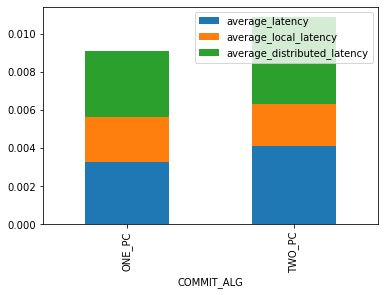

In [20]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig(name+"_latency.png")

In [69]:
latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-69-1b1d8e42c01b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','commit_phase (in us)', 'abort (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  execute_phase (in us)  prepare_phase_1 (in us)  \
0     ONE_PC          0.1               489.7554                 2838.182   
1     TWO_PC          0.1               380.8426                 2677.526   

   prepare_phase_2 (in us)  commit_phase (in us)  abort (in us)  
0                 0.162011              7.351972       0.734264  
1                 0.214610           1060.878000       0.000000  


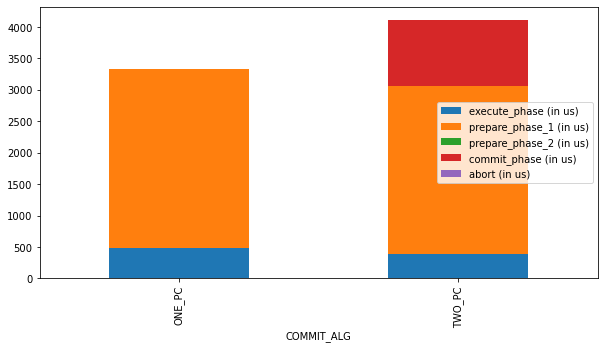

In [70]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
fig.savefig(name+"_phase_breakdown.png")

In [5]:
latency = grouped['network_log (in us)', 'total_log_yes (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-5-f9d8dc48aa43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['network_log (in us)', 'total_log_yes (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  network_log (in us)  total_log_yes (in us)
0     ONE_PC          0.1            559.96018               2318.578
1     TWO_PC          0.1            928.59980               2065.164


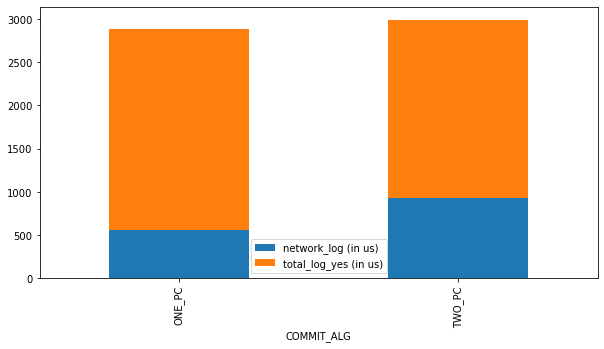

In [6]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
# fig.savefig(name+"_phase_breakdown.png")